In [4]:
import pandas as pd
import random
import time
house_data=pd.read_csv("california-housing-prices/housing.csv")

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
house_data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [33]:
y=house_data["median_house_value"]
feature_names = ["longitude",	"latitude", "housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity"]
X=house_data[feature_names]
X = house_data[feature_names]
X = X.fillna(X.mean(numeric_only=True))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(X,y,test_size=0.3)

In [35]:
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()
enc.fit(X_train[["ocean_proximity"]])  

X_train.loc[:, "ocean_proximity"] = enc.transform(X_train[["ocean_proximity"]])
X_val.loc[:, "ocean_proximity"] = enc.transform(X_val[["ocean_proximity"]])

In [36]:
X_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20151,-119.23,34.44,34.0,3193.0,664.0,1434.0,627.0,2.4777,0.0
13308,-117.61,34.08,20.0,3550.0,736.0,2229.0,681.0,3.0199,1.0
15551,-117.09,33.11,32.0,1713.0,321.0,891.0,286.0,3.1429,0.0


In [42]:
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [46]:
features = X_train_scaled.tolist()
features2 = X_val_scaled.tolist()
y_train_list = y_train.tolist()
y_val_list = y_val.tolist()

In [80]:
#Pure Python Implementation
class LinearRegression1:
    def __init__(self, learning_rate=0.1, iterations=1000):
        self.alpha = learning_rate
        self.iterations = iterations
        self.w = None
        self.b=0
        self.costFunction=[]
        
    def predict(self,X):
        new_y=[]
        for i in range(len(X)):
            pred_y=self.b
            for j in range(len(X[0])):
                pred_y+=self.w[j]*X[i][j]
            new_y.append(pred_y)
        return new_y
        
    def cost_function(self, X, y):
        m = len(y)
        predictions = self.predict(X)
        cost = sum((predictions[i] - y[i]) ** 2 for i in range(m)) / (2 * m)
        return cost
        
    def cost_derivative(self,y_predict,y,X,j):
        m=len(y)
        sum=0
        for i in range(m):
            sum+=(y_predict[i]-y[i])*X[i][j]
        return sum/m
        
    def b_derivative(self,y_predict,y):
        m=len(y)
        sum=0
        for i in range(m):
            sum+=(y_predict[i]-y[i])
        return sum/m
        
    def fit(self,X,y):
        m = len(y)
        n = len(X[0])
        self.w = [random.uniform(-0.01, 0.01) for _ in range(n)]
        self.b = 0
        for iteration in range(self.iterations):
            y_predict=self.predict(X)
            for i in range(n):
                self.w[i]-=self.alpha*self.cost_derivative(y_predict,y,X,i)
            self.b -= self.alpha * self.b_derivative(y_predict, y)
            self.costFunction.append(self.cost_function(X, y))


In [81]:
model = LinearRegression1()
start_time=time.time()
model.fit(features, y_train_list)
end_time=time.time()

pure_time=end_time-start_time
predicted_y1 = model.predict(features2)

print("Predictions:", predicted_y1[:10])
print("Actual:", y_val_list[:10])

Predictions: [207754.65152758043, 174092.03654556352, 325420.9981268321, 93060.0161108461, 164297.342911484, 283337.81858192454, 304865.46046079934, 2571.606202953449, 83191.82445927827, 424215.8403409457]
Actual: [228800.0, 99500.0, 353100.0, 221900.0, 102300.0, 197100.0, 273700.0, 64500.0, 69300.0, 500001.0]


In [82]:
#numpy implementation
import numpy as np
class LinearRegression2:
    def __init__(self, learning_rate=0.1, iterations=1000):
        self.alpha = learning_rate
        self.iterations = iterations
        self.w = None
        self.b = 0
        self.costFunction=[]
        
    def predict(self, X):
        return np.dot(X, self.w) + self.b

    def cost_function(self, X, y):
        m = len(y)
        predictions = self.predict(X)
        cost = sum((predictions - y) ** 2) / (2 * m)
        return cost
        
    def cost_derivative(self, y_predict, y, X):
        m = len(y)
        return np.dot(X.T, (y_predict - y)) / m
        
    def b_derivative(self, y_predict, y):
        m = len(y)
        return np.sum(y_predict - y) / m

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        m, n = X.shape 
        self.w = np.zeros(n)
        self.b = 0
        
        for iteration in range(self.iterations):
            y_predict = self.predict(X)
            self.w -= self.alpha * self.cost_derivative(y_predict, y, X)
            self.b -= self.alpha * self.b_derivative(y_predict, y)
            self.costFunction.append(self.cost_function(X, y))


In [83]:
model2 = LinearRegression2()
start_time=time.time()
model2.fit(features, y_train_list)
end_time=time.time()

numpy_time=end_time-start_time
predicted_y2 = model2.predict(X_val_scaled)

print("Predictions:", predicted_y2[:10])
print("Actual:", y_val_list[:10])

Predictions: [207754.65147474 174092.03648776 325420.9981575   93060.01613503
 164297.34293635 283337.8185348  304865.46044706   2571.60612825
  83191.82442799 424215.84037489]
Actual: [228800.0, 99500.0, 353100.0, 221900.0, 102300.0, 197100.0, 273700.0, 64500.0, 69300.0, 500001.0]


In [84]:
#scikit Implementation
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()

start_time = time.time()
model3.fit(X_train_scaled, y_train)
end_time = time.time()

sk_time=end_time-start_time
predicted_y3 = model3.predict(X_val_scaled)

print("Predictions:", predicted_y3[:10])
print("Actual:", y_val_list[:10])

Predictions: [207558.60031522 173813.48084681 325558.05257519  93192.87858075
 164419.27063898 283128.87126462 304818.07669519   2089.85152552
  83037.18972073 424425.65088183]
Actual: [228800.0, 99500.0, 353100.0, 221900.0, 102300.0, 197100.0, 273700.0, 64500.0, 69300.0, 500001.0]


In [85]:
print("Time Analysis")
print("Pure Python Implementation: ", pure_time)
print("Numpy Implementation: ", numpy_time)
print("Scikit Implementation: ", sk_time)

Time Analysis
Pure Python Implementation:  29.84807276725769
Numpy Implementation:  1.095057487487793
Scikit Implementation:  0.008042335510253906


In [86]:
print("Performance Metrics")
print("Pure Python Analysis")
print("Training Data")
y1_train_predicted=model.predict(features)
print("MAE: ", mean_absolute_error(y_train,y1_train_predicted))
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y1_train_predicted)))
print("R2 Score", r2_score(y_train,y1_train_predicted))
print("Validation Data")
print("MAE: ", mean_absolute_error(y_val,predicted_y1))
print("RMSE: ", np.sqrt(mean_squared_error(y_val,predicted_y1)))
print("R2 Score", r2_score(y_val,predicted_y1))
print("Numpy Implementation Analysis")
print("Training Data")
y2_train_predicted=model2.predict(features)
print("MAE: ", mean_absolute_error(y_train,y2_train_predicted))
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y2_train_predicted)))
print("R2 Score", r2_score(y_train,y2_train_predicted))
print("Validation Data")
print("MAE: ", mean_absolute_error(y_val,predicted_y2))
print("RMSE: ", np.sqrt(mean_squared_error(y_val,predicted_y2)))
print("R2 Score", r2_score(y_val,predicted_y2))
print("Scikit Implementation Analysis")
print("Training Data")
y3_train_predicted=model3.predict(X_train_scaled)
print("MAE: ", mean_absolute_error(y_train,y3_train_predicted))
print("RMSE: ", np.sqrt(mean_squared_error(y_train,y3_train_predicted)))
print("R2 Score", r2_score(y_train,y3_train_predicted))
print("Validation Data")
print("MAE: ", mean_absolute_error(y_val,predicted_y3))
print("RMSE: ", np.sqrt(mean_squared_error(y_val,predicted_y3)))
print("R2 Score", r2_score(y_val,predicted_y3))

Performance Metrics
Pure Python Analysis
Training Data
MAE:  50753.65628596652
RMSE:  69149.06302561311
R2 Score 0.6405278459424575
Validation Data
MAE:  51268.8201890212
RMSE:  70944.41950907093
R2 Score 0.6229190802058171
Numpy Implementation Analysis
Training Data
MAE:  50753.656286173835
RMSE:  69149.06302541347
R2 Score 0.6405278459445329
Validation Data
MAE:  51268.82018995449
RMSE:  70944.41950838693
R2 Score 0.6229190802130884
Scikit Implementation Analysis
Training Data
MAE:  50757.22201601821
RMSE:  69148.62427221455
R2 Score 0.6405324076565865
Validation Data
MAE:  51276.3409486691
RMSE:  70942.84955503102
R2 Score 0.6229357691340576


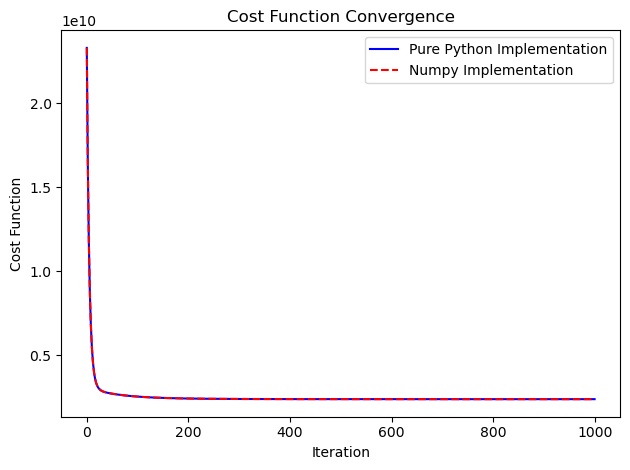

In [87]:
import matplotlib.pyplot as plt
plt.plot(model.costFunction,color="blue",linestyle='-',label="Pure Python Implementation")
plt.plot(model2.costFunction,color="red",linestyle='--',label="Numpy Implementation")
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Cost Function Convergence")
plt.legend()
plt.tight_layout()
plt.show()

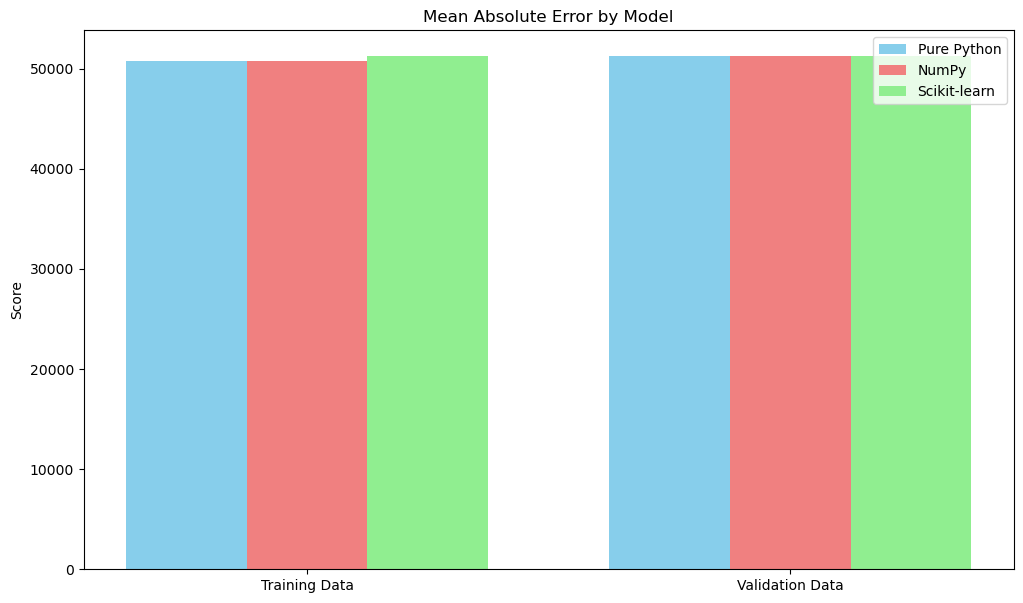

In [88]:
width = 0.25
labels = ['Training Data','Validation Data']
x=np.arange(len(labels))
fig1, ax1 = plt.subplots(figsize=(12, 7))
rects1 = ax1.bar(x - width, [mean_absolute_error(y_train,y1_train_predicted),mean_absolute_error(y_val,predicted_y1)], width, label='Pure Python', color='skyblue')
rects2 = ax1.bar(x, [mean_absolute_error(y_train,y2_train_predicted),mean_absolute_error(y_val,predicted_y2)], width, label='NumPy', color='lightcoral')
rects3 = ax1.bar(x + width, [mean_absolute_error(y_val,predicted_y3),mean_absolute_error(y_val,predicted_y3)], width, label='Scikit-learn', color='lightgreen')

ax1.set_ylabel('Score')
ax1.set_title('Mean Absolute Error by Model')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

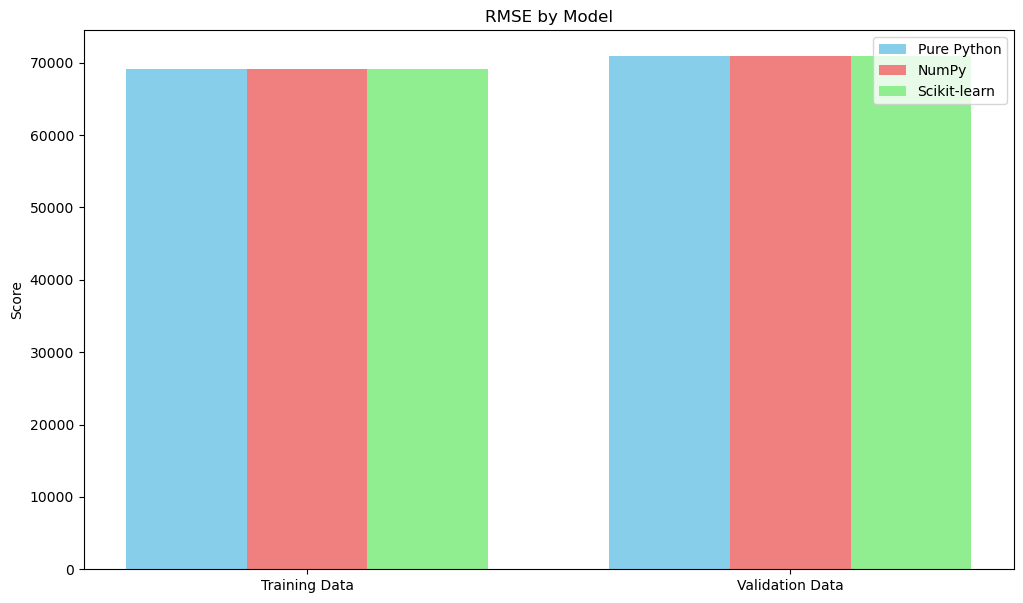

In [89]:
fig2, ax2 = plt.subplots(figsize=(12, 7))
rects4 = ax2.bar(x - width, [np.sqrt(mean_squared_error(y_train,y1_train_predicted)),np.sqrt(mean_squared_error(y_val,predicted_y1))], width, label='Pure Python', color='skyblue')
rects5 = ax2.bar(x, [np.sqrt(mean_squared_error(y_train,y2_train_predicted)),np.sqrt(mean_squared_error(y_val,predicted_y2))], width, label='NumPy', color='lightcoral')
rects6 = ax2.bar(x + width, [np.sqrt(mean_squared_error(y_train,y3_train_predicted)),np.sqrt(mean_squared_error(y_val,predicted_y3))], width, label='Scikit-learn', color='lightgreen')

ax2.set_ylabel('Score')
ax2.set_title('RMSE by Model')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()

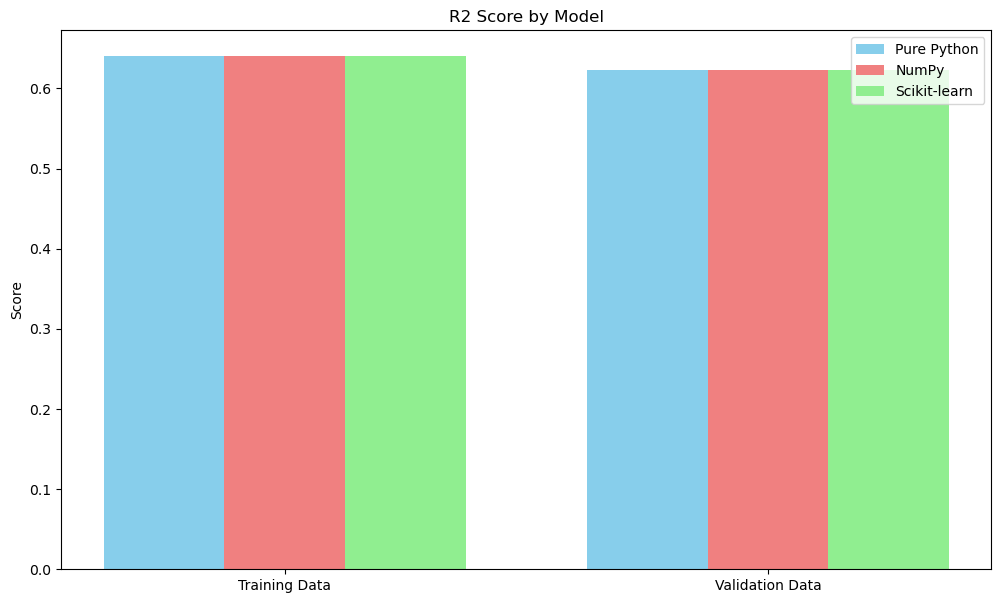

In [90]:
fig3, ax3 = plt.subplots(figsize=(12, 7))
rects7 = ax3.bar(x - width, [r2_score(y_train,y1_train_predicted),r2_score(y_val,predicted_y1)], width, label='Pure Python', color='skyblue')
rects8 = ax3.bar(x, [r2_score(y_train,y2_train_predicted),r2_score(y_val,predicted_y2)], width, label='NumPy', color='lightcoral')
rects9 = ax3.bar(x + width, [r2_score(y_train,y3_train_predicted),r2_score(y_val,predicted_y3)], width, label='Scikit-learn', color='lightgreen')

ax3.set_ylabel('Score')
ax3.set_title('R2 Score by Model')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
ax3.legend()